# SQL Joins Demonstration

This notebook demonstrates various types of SQL joins using SQLAlchemy, pandas, and matplotlib for visualization. 

1. **INNER JOIN**: Returns only matching rows between tables
2. **LEFT JOIN**: Returns all rows from the left table and matching rows from the right
3. **RIGHT JOIN**: Returns all rows from the right table and matching rows from the left
4. **FULL OUTER JOIN**: Returns all rows from both tables
5. **CROSS JOIN**: Returns the Cartesian product of both tables
6. **SELF JOIN**: Joins a table to itself to establish relationships within the data
7. **NATURAL JOIN**: Automatically joins tables based on columns with matching names
8. **NON-EQUI JOIN**: Uses comparison operators other than equality for join conditions

# 2. Insatall Required Libraries

First, let's check if the requirements.txt file exists in our current directory.

In [88]:
# Install if you run this Notebook locally
!pip install pandas
!pip install SQLAlchemy
!pip install ipython
!pip install jupyter
!pip install matplotlib
!pip install seaborn


# 3. Verify Installed Packages

Let's verify that the packages have been successfully installed by importing them and checking their versions.

In [89]:
try:
    import pandas as pd
    import sqlalchemy
    import matplotlib
    import matplotlib.pyplot as plt
    import IPython
    
    # Print version information
    print(f"pandas version: {pd.__version__}")
    print(f"SQLAlchemy version: {sqlalchemy.__version__}")
    print(f"matplotlib version: {matplotlib.__version__}")
    print(f"IPython version: {IPython.__version__}")
    
    # Check for sqlite3
    try:
        import sqlite3
        print(f"sqlite3 version: {sqlite3.version}")
    except ImportError:
        print("sqlite3 is not installed as a separate package, but is included with Python")
        print(f"sqlite3 version: {sqlite3.sqlite_version}")
    
    print("\nAll required packages have been successfully installed and imported!")
except ImportError as e:
    print(f"Error importing package: {e}")

pandas version: 2.3.0
SQLAlchemy version: 2.0.41
matplotlib version: 3.10.3
IPython version: 9.3.0
sqlite3 version: 2.6.0

All required packages have been successfully installed and imported!


/var/folders/cp/_pjh4tv50jv96b4b2_xp6l2c0000gp/T/ipykernel_79735/782973014.py:17: DeprecationWarning: version is deprecated and will be removed in Python 3.14
  print(f"sqlite3 version: {sqlite3.version}")


# 4. SQL Joins Demonstration

Now that we have verified our package installation, let's create some sample data and demonstrate different types of SQL joins. We'll create two sample DataFrames representing two database tables and then show how different join types work.

## Employee DataFrame
- employee_id: Unique identifier for each employee
- name: Name of the employee
- department_id: Identifier for the department the employee belongs to

## Department DataFrame
- department_id: Unique identifier for each department
- department_name: Name of the department



In [90]:
# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import numpy as np

# Set the style for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

# Create sample data for 'employees' table
employees_data = {
    'employee_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'department_id': [101, 102, 101, None, 103]
}

# Create sample data for 'departments' table
departments_data = {
    'department_id': [101, 102, 104, 105],
    'department_name': ['HR', 'Engineering', 'Marketing', 'Finance']
}

# Create DataFrames
employees_df = pd.DataFrame(employees_data)
departments_df = pd.DataFrame(departments_data)

# Display the sample data
print("Employees Table:")
display(employees_df)

print("\nDepartments Table:")
display(departments_df)

Employees Table:


,employee_id,name,department_id
0,1,Alice,101.0
1,2,Bob,102.0
2,3,Charlie,101.0
3,4,David,NaN
4,5,Eva,103.0



Departments Table:


,department_id,department_name
0,101,HR
1,102,Engineering
2,104,Marketing
3,105,Finance


In [91]:
# Create an in-memory SQLite database using SQLAlchemy
engine = create_engine('sqlite:///:memory:')

# Store DataFrames in the database
# Now we have 2 tables: 'employees' and 'departments'
employees_df.to_sql('employees', engine, index=False)
departments_df.to_sql('departments', engine, index=False)

print("Database tables created successfully")

# Verify the tables are created correctly
with engine.connect() as conn:
    # Show all records from both tables
    employees_result = conn.execute(text('SELECT * FROM employees'))
    departments_result = conn.execute(text('SELECT * FROM departments'))
    
    print("\nEmployees table in SQLite:")
    for row in employees_result:
        print(row)
        
    print("\nDepartments table in SQLite:")
    for row in departments_result:
        print(row)

Database tables created successfully

Employees table in SQLite:
(1, 'Alice', 101.0)
(2, 'Bob', 102.0)
(3, 'Charlie', 101.0)
(4, 'David', None)
(5, 'Eva', 103.0)

Departments table in SQLite:
(101, 'HR')
(102, 'Engineering')
(104, 'Marketing')
(105, 'Finance')


## 4.1 INNER JOIN

An INNER JOIN returns only the matching rows from both tables where the join condition is met. Rows with NULL values or without matches are excluded.

INNER JOIN Result:


,employee_id,name,department_id,department_name
0,1,Alice,101.0,HR
1,2,Bob,102.0,Engineering
2,3,Charlie,101.0,HR


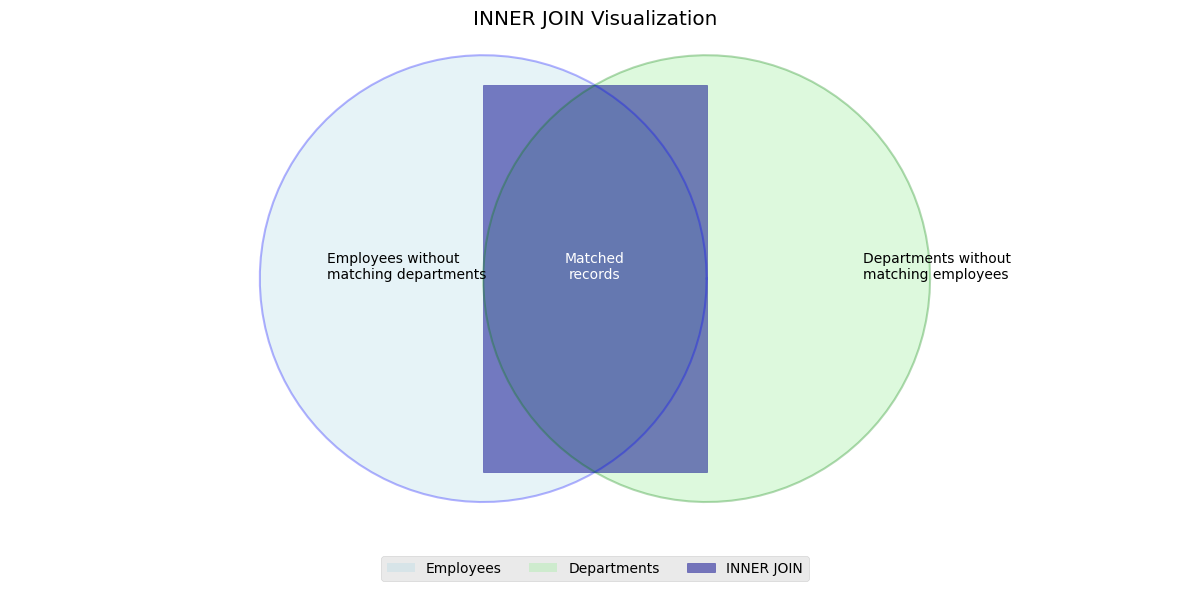


INNER JOIN (SQL): Returns only matching rows
-------------------------------------------
Employees included: Alice (101), Bob (102), Charlie (101)
Employees excluded: David (NULL), Eva (103 - not in departments)
Departments included: HR (101), Engineering (102)
Departments excluded: Marketing (104), Finance (105)
Total rows in result: 3


In [92]:
# Perform INNER JOIN using SQLAlchemy
query = """
    SELECT e.employee_id, e.name, e.department_id, d.department_name
    FROM employees e
    INNER JOIN departments d ON e.department_id = d.department_id
"""

with engine.connect() as conn:
    inner_join_result = pd.read_sql_query(query, conn)

print("INNER JOIN Result:")
display(inner_join_result)

# Visualize the INNER JOIN with a Venn diagram-like plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with two circles representing the tables
theta = np.linspace(0, 2 * np.pi, 100)

# Employee circle (blue)
r1 = 1
x1 = r1 * np.cos(theta) - 0.5
y1 = r1 * np.sin(theta)
plt.plot(x1, y1, 'b-', alpha=0.3)
plt.fill(x1, y1, 'lightblue', alpha=0.3, label='Employees')

# Department circle (green)
r2 = 1
x2 = r2 * np.cos(theta) + 0.5
y2 = r2 * np.sin(theta)
plt.plot(x2, y2, 'g-', alpha=0.3)
plt.fill(x2, y2, 'lightgreen', alpha=0.3, label='Departments')

# Intersection (darker blue)
plt.fill_between([-0.5, 0.5], -np.sqrt(0.75), np.sqrt(0.75), color='darkblue', alpha=0.5, label='INNER JOIN')

plt.text(-1.2, 0, "Employees without\nmatching departments", fontsize=10)
plt.text(1.2, 0, "Departments without\nmatching employees", fontsize=10)
plt.text(0, 0, "Matched\nrecords", fontsize=10, ha='center', color='white')

plt.axis('equal')
plt.axis('off')
plt.title('INNER JOIN Visualization')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.tight_layout()
plt.show()

# Also present the result in text form for clarity
print("\nINNER JOIN (SQL): Returns only matching rows")
print("-------------------------------------------")
print("Employees included: Alice (101), Bob (102), Charlie (101)")
print("Employees excluded: David (NULL), Eva (103 - not in departments)")
print("Departments included: HR (101), Engineering (102)")
print("Departments excluded: Marketing (104), Finance (105)")
print("Total rows in result: 3")

## 4.2 LEFT JOIN (LEFT OUTER JOIN)

A LEFT JOIN returns all rows from the left table and the matched rows from the right table. If there's no match in the right table, NULL values are returned for the right table's columns.

LEFT JOIN Result:


,employee_id,name,department_id,department_name
0,1,Alice,101.0,HR
1,2,Bob,102.0,Engineering
2,3,Charlie,101.0,HR
3,4,David,NaN,None
4,5,Eva,103.0,None


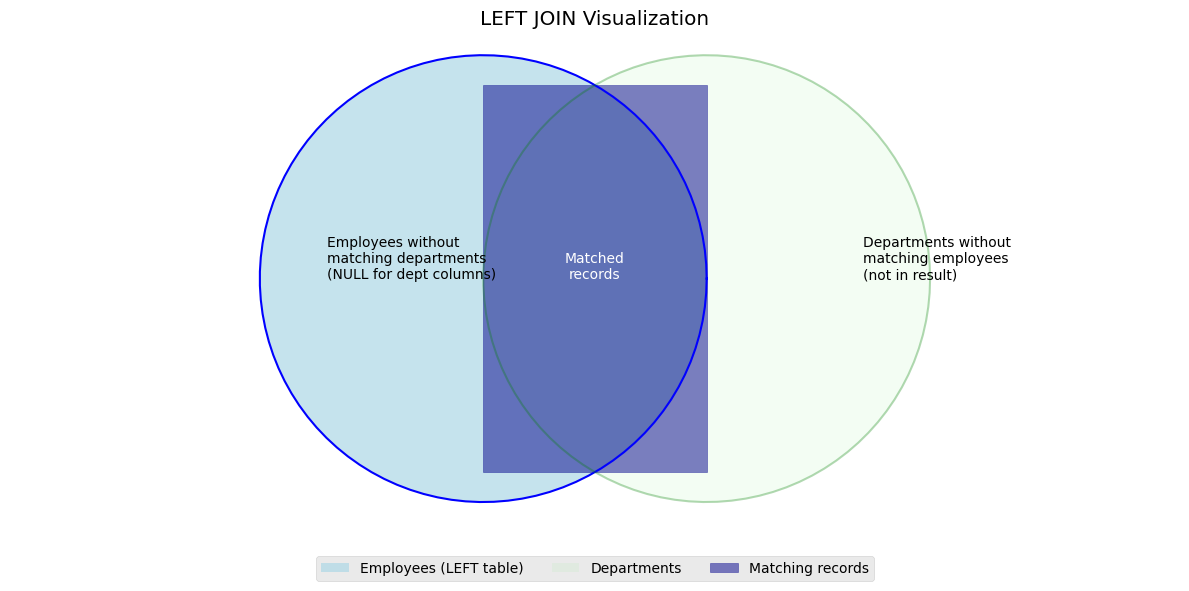


LEFT JOIN (SQL): Returns all rows from the left table and matching rows from the right table
---------------------------------------------------------------------------------------
Employees included: ALL (5 rows)
  - Alice (101) with HR department
  - Bob (102) with Engineering department
  - Charlie (101) with HR department
  - David (NULL) with NULL department_name
  - Eva (103) with NULL department_name (no matching department)
Total rows in result: 5


In [93]:
# Perform LEFT JOIN using SQLAlchemy
query = """
    SELECT e.employee_id, e.name, e.department_id, d.department_name
    FROM employees e
    LEFT JOIN departments d ON e.department_id = d.department_id
"""

with engine.connect() as conn:
    left_join_result = pd.read_sql_query(query, conn)

print("LEFT JOIN Result:")
display(left_join_result)

# Visualize the LEFT JOIN with a Venn diagram-like plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with two circles representing the tables
theta = np.linspace(0, 2 * np.pi, 100)

# Employee circle (blue) - completely colored since it's a LEFT JOIN
r1 = 1
x1 = r1 * np.cos(theta) - 0.5
y1 = r1 * np.sin(theta)
plt.plot(x1, y1, 'b-')
plt.fill(x1, y1, 'lightblue', alpha=0.7, label='Employees (LEFT table)')

# Department circle (green) - only intersection colored
r2 = 1
x2 = r2 * np.cos(theta) + 0.5
y2 = r2 * np.sin(theta)
plt.plot(x2, y2, 'g-', alpha=0.3)

# Just the outline for departments
plt.fill(x2, y2, 'lightgreen', alpha=0.1, label='Departments')

# Intersection darker
plt.fill_between([-0.5, 0.5], -np.sqrt(0.75), np.sqrt(0.75), color='darkblue', alpha=0.5, label='Matching records')

plt.text(-1.2, 0, "Employees without\nmatching departments\n(NULL for dept columns)", fontsize=10)
plt.text(1.2, 0, "Departments without\nmatching employees\n(not in result)", fontsize=10)
plt.text(0, 0, "Matched\nrecords", fontsize=10, ha='center', color='white')

plt.axis('equal')
plt.axis('off')
plt.title('LEFT JOIN Visualization')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.tight_layout()
plt.show()

# Also present the result in text form for clarity
print("\nLEFT JOIN (SQL): Returns all rows from the left table and matching rows from the right table")
print("---------------------------------------------------------------------------------------")
print("Employees included: ALL (5 rows)")
print("  - Alice (101) with HR department")
print("  - Bob (102) with Engineering department")
print("  - Charlie (101) with HR department")
print("  - David (NULL) with NULL department_name")
print("  - Eva (103) with NULL department_name (no matching department)")
print("Total rows in result: 5")

## 4.3 RIGHT JOIN (RIGHT OUTER JOIN)

A RIGHT JOIN returns all rows from the right table and the matched rows from the left table. If there's no match in the left table, NULL values are returned for the left table's columns.

Note: SQLite doesn't support RIGHT JOIN directly, so we'll simulate it by swapping the tables in a LEFT JOIN.

RIGHT JOIN Result (simulated in SQLite):


,employee_id,name,department_id,department_name
0,1.0,Alice,101,HR
1,3.0,Charlie,101,HR
2,2.0,Bob,102,Engineering
3,NaN,None,104,Marketing
4,NaN,None,105,Finance


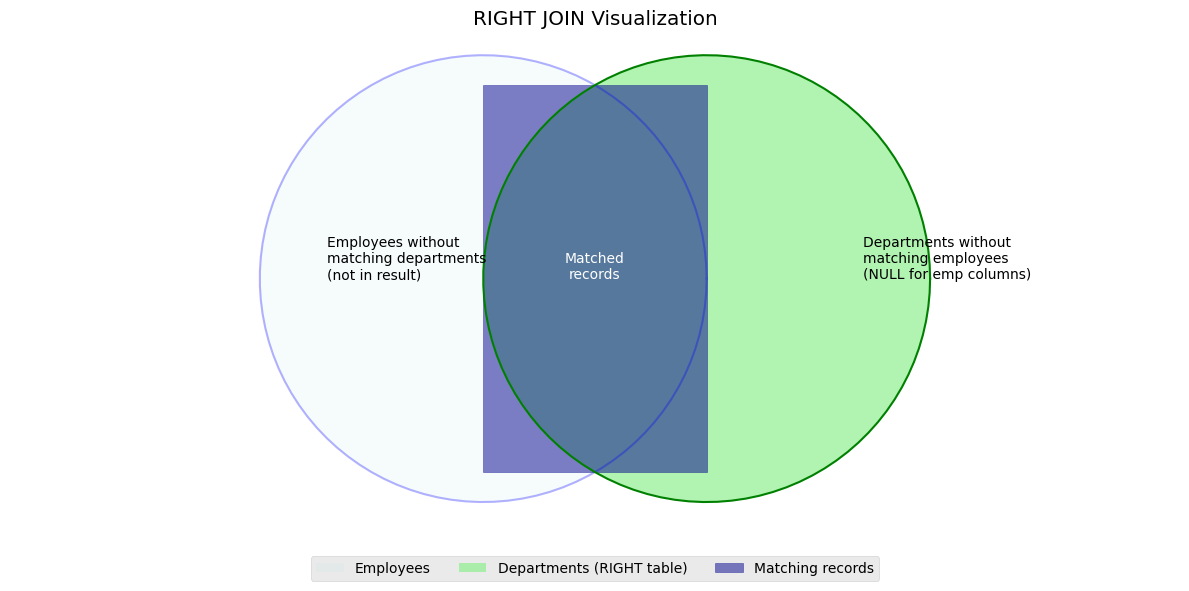


RIGHT JOIN (SQL): Returns all rows from the right table and matching rows from the left table
----------------------------------------------------------------------------------------
Departments included: ALL (4 rows)
  - HR (101) with Alice and Charlie
  - Engineering (102) with Bob
  - Marketing (104) with NULL employee data (no matching employee)
  - Finance (105) with NULL employee data (no matching employee)
Note: The HR department appears twice because it matches two employees
Total rows in result: 5


In [94]:
# Perform RIGHT JOIN (simulated with LEFT JOIN by swapping tables) using SQLAlchemy
query = """
    SELECT e.employee_id, e.name, d.department_id, d.department_name
    FROM departments d
    LEFT JOIN employees e ON d.department_id = e.department_id
"""

with engine.connect() as conn:
    right_join_result = pd.read_sql_query(query, conn)

print("RIGHT JOIN Result (simulated in SQLite):")
display(right_join_result)

# Visualize the RIGHT JOIN with a Venn diagram-like plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with two circles representing the tables
theta = np.linspace(0, 2 * np.pi, 100)

# Employee circle (blue) - only intersection colored
r1 = 1
x1 = r1 * np.cos(theta) - 0.5
y1 = r1 * np.sin(theta)
plt.plot(x1, y1, 'b-', alpha=0.3)
plt.fill(x1, y1, 'lightblue', alpha=0.1, label='Employees')

# Department circle (green) - completely colored since it's a RIGHT JOIN
r2 = 1
x2 = r2 * np.cos(theta) + 0.5
y2 = r2 * np.sin(theta)
plt.plot(x2, y2, 'g-')
plt.fill(x2, y2, 'lightgreen', alpha=0.7, label='Departments (RIGHT table)')

# Intersection darker
plt.fill_between([-0.5, 0.5], -np.sqrt(0.75), np.sqrt(0.75), color='darkblue', alpha=0.5, label='Matching records')

plt.text(-1.2, 0, "Employees without\nmatching departments\n(not in result)", fontsize=10)
plt.text(1.2, 0, "Departments without\nmatching employees\n(NULL for emp columns)", fontsize=10)
plt.text(0, 0, "Matched\nrecords", fontsize=10, ha='center', color='white')

plt.axis('equal')
plt.axis('off')
plt.title('RIGHT JOIN Visualization')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.tight_layout()
plt.show()

# Also present the result in text form for clarity
print("\nRIGHT JOIN (SQL): Returns all rows from the right table and matching rows from the left table")
print("----------------------------------------------------------------------------------------")
print("Departments included: ALL (4 rows)")
print("  - HR (101) with Alice and Charlie")
print("  - Engineering (102) with Bob") 
print("  - Marketing (104) with NULL employee data (no matching employee)")
print("  - Finance (105) with NULL employee data (no matching employee)")
print("Note: The HR department appears twice because it matches two employees")
print("Total rows in result: 5")

## 4.4 FULL OUTER JOIN

A FULL OUTER JOIN returns all rows from both tables. Where there are matches, the data is combined. Where there's no match, NULL values are used for the columns of the table without a matching row.

Note: SQLite doesn't support FULL OUTER JOIN directly, so we'll simulate it by combining a LEFT JOIN and a RIGHT JOIN with UNION.

FULL OUTER JOIN Result (simulated in SQLite):


,employee_id,name,department_id,department_name
0,NaN,None,104.0,Marketing
1,NaN,None,105.0,Finance
2,1.0,Alice,101.0,HR
3,2.0,Bob,102.0,Engineering
4,3.0,Charlie,101.0,HR
5,4.0,David,NaN,None
6,5.0,Eva,103.0,None


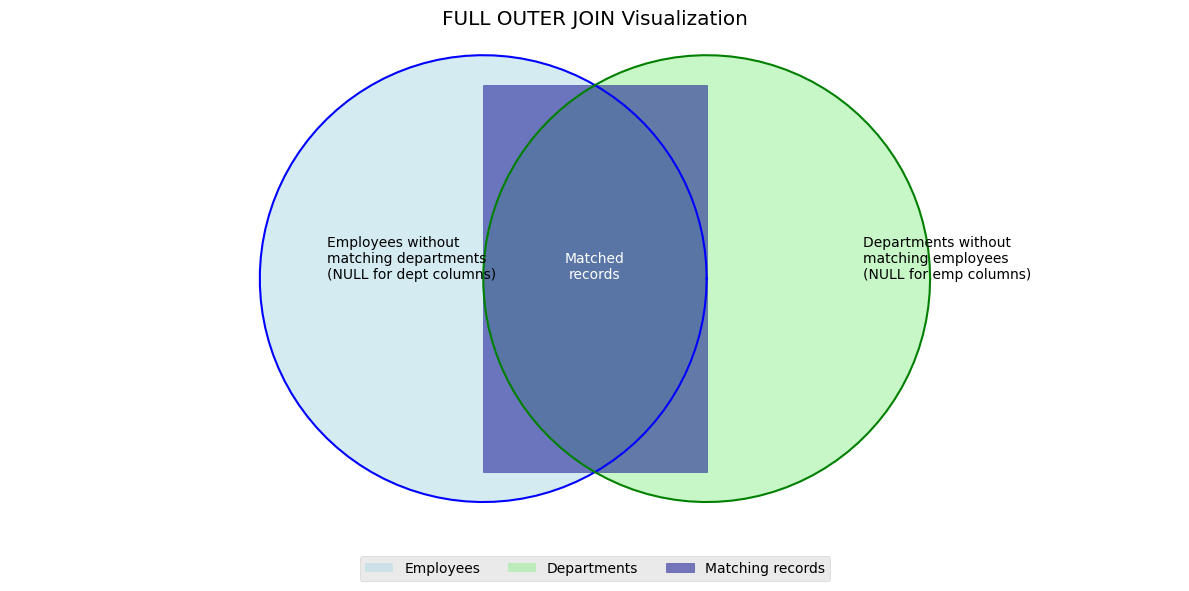


FULL OUTER JOIN (SQL): Returns all rows from both tables
------------------------------------------------------
All employees (5) and departments (4) included in the result
Matching records have complete data
Non-matching records have NULL values for the unmatched table
Total rows in result: 7


In [95]:
# Perform FULL OUTER JOIN (simulated with UNION of LEFT and RIGHT joins) using SQLAlchemy
query = """
    SELECT e.employee_id, e.name, COALESCE(e.department_id, d.department_id) as department_id, d.department_name
    FROM employees e
    LEFT JOIN departments d ON e.department_id = d.department_id
    
    UNION
    
    SELECT e.employee_id, e.name, d.department_id, d.department_name
    FROM departments d
    LEFT JOIN employees e ON d.department_id = e.department_id
    WHERE e.employee_id IS NULL
"""

with engine.connect() as conn:
    full_outer_join_result = pd.read_sql_query(query, conn)

print("FULL OUTER JOIN Result (simulated in SQLite):")
display(full_outer_join_result)

# Visualize the FULL OUTER JOIN with a Venn diagram-like plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with two circles representing the tables
theta = np.linspace(0, 2 * np.pi, 100)

# Employee circle (blue)
r1 = 1
x1 = r1 * np.cos(theta) - 0.5
y1 = r1 * np.sin(theta)
plt.plot(x1, y1, 'b-')
plt.fill(x1, y1, 'lightblue', alpha=0.5, label='Employees')

# Department circle (green)
r2 = 1
x2 = r2 * np.cos(theta) + 0.5
y2 = r2 * np.sin(theta)
plt.plot(x2, y2, 'g-')
plt.fill(x2, y2, 'lightgreen', alpha=0.5, label='Departments')

# Intersection darker
plt.fill_between([-0.5, 0.5], -np.sqrt(0.75), np.sqrt(0.75), color='darkblue', alpha=0.5, label='Matching records')

plt.text(-1.2, 0, "Employees without\nmatching departments\n(NULL for dept columns)", fontsize=10)
plt.text(1.2, 0, "Departments without\nmatching employees\n(NULL for emp columns)", fontsize=10)
plt.text(0, 0, "Matched\nrecords", fontsize=10, ha='center', color='white')

plt.axis('equal')
plt.axis('off')
plt.title('FULL OUTER JOIN Visualization')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.tight_layout()
plt.show()

# Also present the result in text form for clarity
print("\nFULL OUTER JOIN (SQL): Returns all rows from both tables")
print("------------------------------------------------------")
print("All employees (5) and departments (4) included in the result")
print("Matching records have complete data")
print("Non-matching records have NULL values for the unmatched table")
print("Total rows in result: 7")

## 4.5 CROSS JOIN

A CROSS JOIN returns the Cartesian product of the two tables - every row from the first table is paired with every row from the second table. This can result in a very large result set.

CROSS JOIN Result:


,employee_id,name,emp_dept_id,dept_id,department_name
0,1,Alice,101.0,101,HR
1,1,Alice,101.0,102,Engineering
2,1,Alice,101.0,104,Marketing
3,1,Alice,101.0,105,Finance
4,2,Bob,102.0,101,HR
5,2,Bob,102.0,102,Engineering
6,2,Bob,102.0,104,Marketing
7,2,Bob,102.0,105,Finance
8,3,Charlie,101.0,101,HR
9,3,Charlie,101.0,102,Engineering


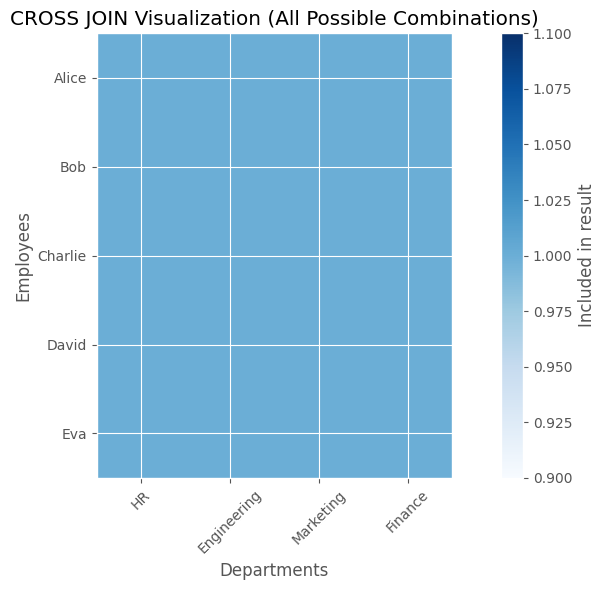


CROSS JOIN (SQL): Returns the Cartesian product of both tables
--------------------------------------------------------
All possible combinations of employees and departments
Total rows in result: 20 (5 employees × 4 departments)
Note: No relationship or matching condition is used in a CROSS JOIN


In [96]:
# Perform CROSS JOIN using SQLAlchemy
query = """
    SELECT e.employee_id, e.name, e.department_id as emp_dept_id, d.department_id as dept_id, d.department_name
    FROM employees e
    CROSS JOIN departments d
"""

with engine.connect() as conn:
    cross_join_result = pd.read_sql_query(query, conn)

print("CROSS JOIN Result:")
display(cross_join_result)

# Create a matrix visualization of the CROSS JOIN
plt.figure(figsize=(10, 6))

# Get unique employees and departments for matrix visualization
employees_list = employees_df['name'].tolist()
departments_list = departments_df['department_name'].tolist()

# Create a grid
grid = np.zeros((len(employees_list), len(departments_list)))
grid[:] = 1  # All combinations exist in a CROSS JOIN

# Plot the grid as a heatmap
plt.imshow(grid, cmap='Blues', interpolation='none')
plt.xticks(np.arange(len(departments_list)), departments_list, rotation=45)
plt.yticks(np.arange(len(employees_list)), employees_list)
plt.xlabel('Departments')
plt.ylabel('Employees')
plt.title('CROSS JOIN Visualization (All Possible Combinations)')
plt.colorbar(label='Included in result')
plt.tight_layout()
plt.show()

# Also present the result in text form for clarity
print("\nCROSS JOIN (SQL): Returns the Cartesian product of both tables")
print("--------------------------------------------------------")
print("All possible combinations of employees and departments")
print(f"Total rows in result: {len(employees_df) * len(departments_df)} (5 employees × 4 departments)")
print("Note: No relationship or matching condition is used in a CROSS JOIN")

## 4.6 SELF JOIN

A SELF JOIN is when a table is joined with itself. This is useful for querying hierarchical data or comparing rows within the same table. Let's create a new table to demonstrate this concept.

Employees Hierarchy Table:


,employee_id,name,manager_id
0,101,John,NaN
1,102,Mary,101.0
2,103,Steve,101.0
3,104,Anna,102.0
4,105,Mike,102.0
5,106,Sarah,103.0


SELF JOIN Result:


,employee_id,employee_name,manager_id,manager_name
0,101,John,NaN,None
1,102,Mary,101.0,John
2,103,Steve,101.0,John
3,104,Anna,102.0,Mary
4,105,Mike,102.0,Mary
5,106,Sarah,103.0,Steve


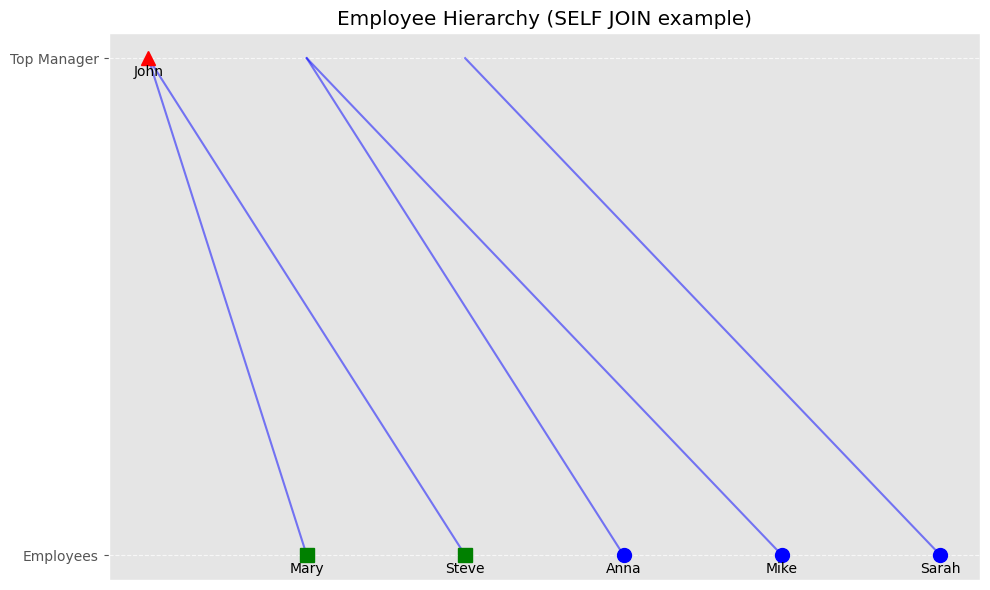


SELF JOIN: Joining a table with itself to establish relationships within the data
--------------------------------------------------------------------------
Hierarchy shown: Each employee and their manager
John (101): Top manager (no manager)
Mary (102): Managed by John
Steve (103): Managed by John
Anna (104): Managed by Mary
Mike (105): Managed by Mary
Sarah (106): Managed by Steve


In [97]:
# Create sample data for employee hierarchy
employees_hierarchy_data = {
    'employee_id': [101, 102, 103, 104, 105, 106],
    'name': ['John', 'Mary', 'Steve', 'Anna', 'Mike', 'Sarah'],
    'manager_id': [None, 101, 101, 102, 102, 103]
}

# Create DataFrame and add to database
employees_hierarchy_df = pd.DataFrame(employees_hierarchy_data)
employees_hierarchy_df.to_sql('employees_hierarchy', engine, index=False)

print("Employees Hierarchy Table:")
display(employees_hierarchy_df)

# Perform SELF JOIN to find each employee's manager using SQLAlchemy
query = """
    SELECT e.employee_id, e.name as employee_name, e.manager_id, m.name as manager_name
    FROM employees_hierarchy e
    LEFT JOIN employees_hierarchy m ON e.manager_id = m.employee_id
    ORDER BY e.manager_id NULLS FIRST
"""

with engine.connect() as conn:
    self_join_result = pd.read_sql_query(query, conn)

print("SELF JOIN Result:")
display(self_join_result)

# Visualize the employee hierarchy in a tree-like structure
plt.figure(figsize=(10, 6))

# Create a dictionary of employees by ID
employees_dict = {row['employee_id']: row for _, row in employees_hierarchy_df.iterrows()}

# Plot connections between managers and their direct reports
for _, row in employees_hierarchy_df.iterrows():
    # Check both for None and NaN values
    if pd.notna(row['manager_id']):
        manager = employees_dict[row['manager_id']]
        plt.plot([manager['employee_id'], row['employee_id']], [0, -1], 'b-', alpha=0.5)
        
# Plot employee points with different colors for managers vs employees
for _, row in employees_hierarchy_df.iterrows():
    is_manager = any(pd.notna(r['manager_id']) and r['manager_id'] == row['employee_id'] for _, r in employees_hierarchy_df.iterrows())
    color = 'red' if pd.isna(row['manager_id']) else ('green' if is_manager else 'blue')
    marker = '^' if pd.isna(row['manager_id']) else ('s' if is_manager else 'o')
    pos_y = 0 if pd.isna(row['manager_id']) else -1
    plt.plot(row['employee_id'], pos_y, marker, markersize=10, color=color)
    plt.annotate(row['name'], (row['employee_id'], pos_y), 
                 xytext=(0, -10), textcoords='offset points', 
                 ha='center', va='center')

plt.title('Employee Hierarchy (SELF JOIN example)')
plt.yticks([-1, 0], ['Employees', 'Top Manager'])
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Also present the result in text form for clarity
print("\nSELF JOIN: Joining a table with itself to establish relationships within the data")
print("--------------------------------------------------------------------------")
print("Hierarchy shown: Each employee and their manager")
print("John (101): Top manager (no manager)")
print("Mary (102): Managed by John")
print("Steve (103): Managed by John")
print("Anna (104): Managed by Mary")
print("Mike (105): Managed by Mary")
print("Sarah (106): Managed by Steve")

# 5. Summary and Conclusion

In this notebook, we have demonstrated various types of SQL joins:

1. **INNER JOIN**: Returns only matching rows between tables
2. **LEFT JOIN**: Returns all rows from the left table and matching rows from the right
3. **RIGHT JOIN**: Returns all rows from the right table and matching rows from the left
4. **FULL OUTER JOIN**: Returns all rows from both tables
5. **CROSS JOIN**: Returns the Cartesian product of both tables
6. **SELF JOIN**: Joins a table to itself to establish relationships within the data
7. **NATURAL JOIN**: Automatically joins tables based on columns with matching names
8. **NON-EQUI JOIN**: Uses comparison operators other than equality for join conditions

These join operations are fundamental to SQL database operations and are essential for combining data from multiple tables in meaningful ways. Understanding the different types of joins enables more powerful and flexible data querying and analysis.

# 6. Additional Join Types

In addition to the six join types demonstrated above, there are other important SQL join types worth knowing:

## NATURAL JOIN

A NATURAL JOIN is a special type of join that automatically joins tables based on columns with matching names.

- It automatically identifies columns with the **same name** in both tables
- Creates an implicit join condition based on these matching columns
- Only includes one copy of each matching column in the result
- Can be INNER, LEFT, or RIGHT (though most commonly implemented as an INNER join)

### Example:
```sql
-- If both tables have 'department_id' columns, this automatically joins on that column
SELECT * FROM employees NATURAL JOIN departments;
```

## NON-EQUI JOIN

Non-equi joins use comparison operators other than equality (`=`) in the join condition.

- Uses operators like `>`, `<`, `>=`, `<=`, `BETWEEN`, etc.
- Useful for range-based comparisons or when exact matches are not desired
- Often used for:
  - Finding ranges (salary bands, date ranges)
  - Hierarchical data
  - Identifying gaps or overlaps

### Example:
```sql
-- Find employees whose salary is within a specific salary range
SELECT e.name, e.salary, g.grade
FROM employees e
JOIN salary_grades g
ON e.salary BETWEEN g.min_salary AND g.max_salary;
```

These additional join types expand the SQL join toolkit and provide more specialized ways to combine data from multiple tables.